# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,✅ Trip Verified | British Airways Flight fro...
1,✅ Trip Verified | British Airways World Trav...
2,✅ Trip Verified | BA is barely a step above ...
3,Not Verified | Happy with the flight crew. Ha...
4,✅ Trip Verified | Horrible service from boar...
5,Not Verified | My wife and I are very disappo...
6,Not Verified | We flew BA between Heathrow an...
7,Not Verified | Absolutely disgusted with BA. ...
8,Not Verified | Took a trip to Nashville with m...
9,Not Verified | A nightmare journey courtesy o...


In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/BA_reviews.csv')

# first few rows
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | British Airways Flight fro...
1,1,✅ Trip Verified | British Airways World Trav...
2,2,✅ Trip Verified | BA is barely a step above ...
3,3,Not Verified | Happy with the flight crew. Ha...
4,4,✅ Trip Verified | Horrible service from boar...


Data Cleaning

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# text cleaning
def text_clean(text):

    # remove special characters and numbers
    text = re.sub(r'\d+', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # convert to lowercase
    text = text.lower()

    # tokenize text
    words = word_tokenize(text)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

In [ ]:
# spply cleaning function to reviews column
df['reviews_cleaned'] = df['reviews'].apply(text_clean)
df[['reviews', 'reviews_cleaned']].head(10)

,reviews,reviews_cleaned
0,✅ Trip Verified | British Airways Flight fro...,✅ trip verified british airways flight edinbur...
1,✅ Trip Verified | British Airways World Trav...,✅ trip verified british airways world travelle...
2,✅ Trip Verified | BA is barely a step above ...,✅ trip verified ba barely step low cost airlin...
3,Not Verified | Happy with the flight crew. Ha...,verified happy flight crew hadnt plane years s...
4,✅ Trip Verified | Horrible service from boar...,✅ trip verified horrible service boarding land...
5,Not Verified | My wife and I are very disappo...,verified wife disappointed flying british airw...
6,Not Verified | We flew BA between Heathrow an...,verified flew ba heathrow berlin one way conne...
7,Not Verified | Absolutely disgusted with BA. ...,verified absolutely disgusted ba flights cance...
8,Not Verified | Took a trip to Nashville with m...,verified took trip nashville wife leisure brea...
9,Not Verified | A nightmare journey courtesy o...,verified nightmare journey courtesy british ai...


Counting word frequencies

In [103]:
from collections import Counter

# count word frequencies in reviews
word_counts = Counter(' '.join(df['reviews_cleaned']).split())

# counter to a DataFrame for visualization
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Sort by frequency in desc order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

print(word_freq_df.head(10))

# save the word frequencies to a text file
word_freq_df.to_csv('data/word_frequencies.txt', sep='\t', index=False)

         Word  Frequency
5      flight       1966
75         ba       1294
2    verified       1004
1        trip        866
0           ✅        742
136   service        730
92          ’        605
113      time        532
139    london        483
151     class        450


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sentiment Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-127-51586258bc56>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y=sentiment_counts.index, x=sentiment_counts.values, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass

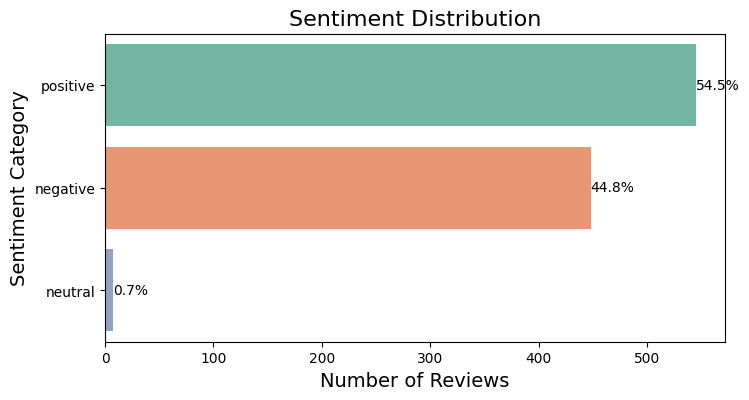

In [127]:
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')

# initialize analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# sentiment analysis for compound score
df['sentiment'] = df['reviews_cleaned'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

# classify reviews into positive, negative, or neutral
df['sentiment_category'] = df['sentiment'].apply(
    lambda x: 'positive' if x > 0
          else ('negative' if x < 0
          else 'neutral'))

# count number of reviews in each category
sentiment_counts = df['sentiment_category'].value_counts()

# get percentages
total_reviews = sentiment_counts.sum()
percentages = (sentiment_counts / total_reviews) * 100

# plot barchart
plt.figure(figsize=(8, 4))  # Adjust the figure size for a skinnier appearance
barplot = sns.barplot(y=sentiment_counts.index, x=sentiment_counts.values, palette='Set2')

# % values on the bars
for index, value in enumerate(sentiment_counts):
    percentage = f"{percentages[index]:.1f}%"  # Format to 1 decimal place
    barplot.text(value, index, percentage, va='center')  # Add text to the bars

plt.title('Sentiment Distribution', fontsize=16)
plt.ylabel('Sentiment Category', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=14)
plt.show()

In [ ]:
print(df['sentiment_category'].unique())

['negative' 'positive' 'neutral']


WordClouds

In [97]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wordcloud for positive words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


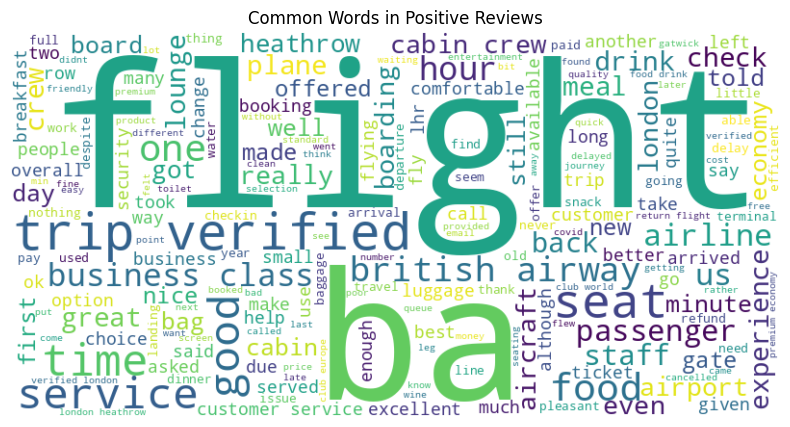

In [98]:
# filter positive reviews
pos_reviews = df[df['sentiment_category'] == 'positive']['reviews_cleaned']

# all positive reviews into one large text
pos_text = ' '.join(pos_reviews)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)

# Plot the WordCloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Positive Reviews')
plt.show()

Wordcloud for negative words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


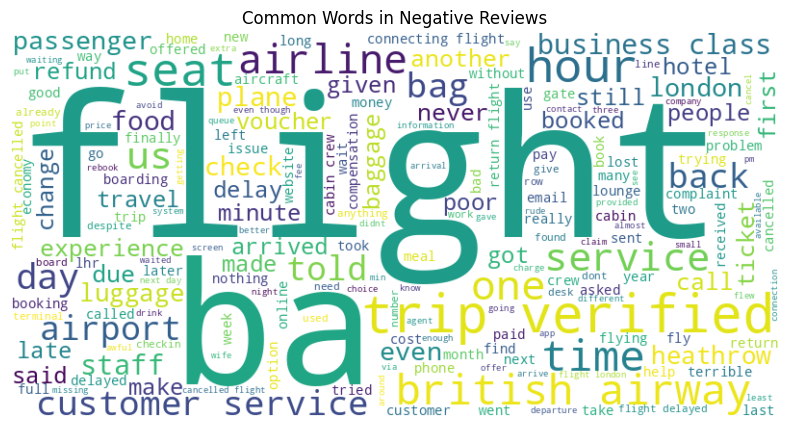

In [99]:
# filter negative reviews
neg_reviews = df[df['sentiment_category'] == 'negative']['reviews_cleaned']

# all negitive reviews into one large text
neg_text = ' '.join(neg_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(neg_text)

# Plot the WordCloud for negative reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Negative Reviews')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


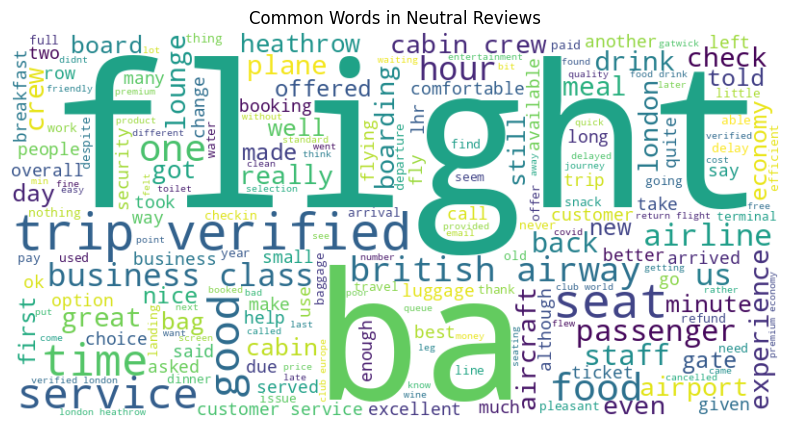

In [100]:
# Filter neutral reviews
neu_reviews = df[df['sentiment_category'] == 'neutral']['reviews_cleaned']

# all neutral reviews into one large text
neu_text = ' '.join(neu_reviews)
wordcloud_neu = WordCloud(width=800, height=400, background_color='white').generate(neu_text)

# Plot the WordCloud for neutral reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Neutral Reviews')
plt.show()

word count in entire text

WordCloud to visualize the most overall frequent words in the reviews

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


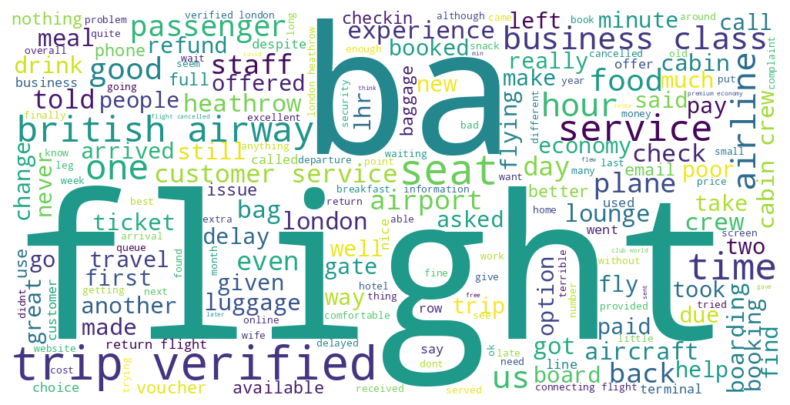

In [107]:
# combine all the cleaned reviews into one large text
text = ' '.join(df['reviews_cleaned'])

# generate the word cloud
wc = WordCloud(width=1000, height=500, background_color='white').generate(text)

# plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Topic Modeling using Latent Dirichlet Allocation (LDA)
probabilistic interpretation of topics to understand the contributions of various words to each topic.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [142]:
# vectorize text
vect = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
vect_fit = vect.fit_transform(df['reviews_cleaned'])

# fit LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(vect_fit)

# repare data for table
topics = []
keywords = []

# display the top words for each topic
for i, topic in enumerate(lda.components_):
    print(f'Topic {i+1}:')
    print([vect.get_feature_names_out()[index] for index in topic.argsort()[-10:]])

    topics.append(f'Topic {i+1}')
    keywords.append([vect.get_feature_names_out()[index] for index in topic.argsort()[-10:]])

# in a table-like format
print(f"{'Topic':<10} | {'Top Keywords'}")
print('-' * 50)
for topic, kw in zip(topics, keywords):
    print(f"{topic:<10} | {', '.join(kw)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1:
['check', 'heathrow', 'luggage', 'london', 'service', 'staff', 'time', 'ba', 'trip', 'flight']
Topic 2:
['staff', 'airways', 'british', 'food', 'business', 'trip', 'class', 'service', 'flight', 'ba']
Topic 3:
['booked', 'voucher', 'trip', 'customer', 'phone', 'booking', 'refund', 'ticket', 'ba', 'flight']
Topic 4:
['boarding', 'time', 'passengers', 'class', 'service', 'business', 'staff', 'trip', 'flight', 'ba']
Topic 5:
['singapore', 'hour', 'cabin', 'london', 'crew', 'airways', 'trip', 'british', 'luggage', 'flight']
Topic 6:
['refund', 'told', 'london', 'trip', 'service', 'customer', 'airways', 'british', 'flight', 'ba']
Topic 7:
['time', 'cabin', 'seats', 'ba', 'food', 'trip', 'crew', 'seat', 'good', 'flight']
Topic 8:
['ba', 'day', 'london', 'hotel', 'trip', 'airport', 'told', 'cancelled', 'hours', 'flight']
Topic 9:
['arrived', 'trip', 'london', 'ba', 'time', 'customer', 'british', 'airways', 'service', 'flight']
Topic 10:
['food', 'seats', 'good', 'seat', 'business', 'c

In [137]:
# topic distribution for each document
topic_distribution = lda.transform(vect_fit)

# sum to find the most discussed topics
topic_sum = topic_distribution.sum(axis=0)

# df to display topic contributions
topic_contributions = pd.DataFrame(topic_sum, index=[f'Topic {i+1}' for i in range(10)], columns=['Topic Contribution'])
topic_contributions = topic_contributions.sort_values(by='Topic Contribution', ascending=False)
print(topic_contributions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


          Topic Contribution
Topic 7           204.920186
Topic 1           179.800733
Topic 2           135.700996
Topic 6           108.062293
Topic 10           88.661883
Topic 8            81.702660
Topic 4            74.343355
Topic 3            63.509624
Topic 5            32.105553
Topic 9            31.192717


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1000x600 with 0 Axes>

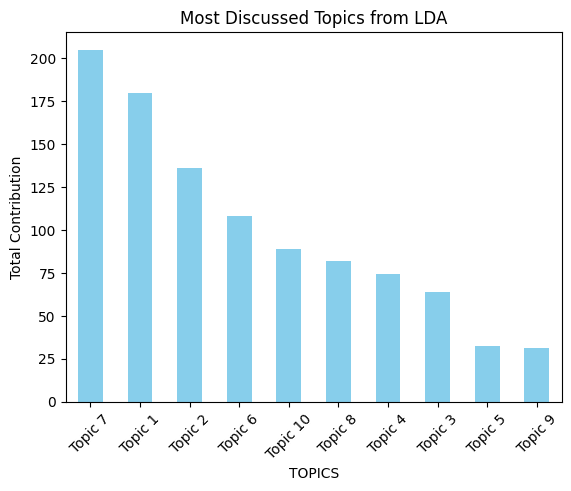

In [139]:
# plot the Topic Distribution Bar Chart
plt.figure(figsize=(10, 6))
topic_contributions.plot(kind='bar', legend=False, color='skyblue')
plt.title('Most Discussed Topics from LDA')
plt.ylabel('Total Contribution')
plt.xlabel('TOPICS')
plt.xticks(rotation=45)
plt.show()